In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil

In [2]:
df1 = pd.read_csv('/Users/yairmartinez/Documents/GitHub/Data_visualization/Extract/sales_train_evaluation.csv' , header= None )
# df2= pd.read_csv('/Users/yairmartinez/Documents/GitHub/Data_visualization/Extract/sell_prices.csv')
# df3= pd.read_csv('/Users/yairmartinez/Documents/GitHub/Data_visualization/Extract/calendar.csv')

/var/folders/v1/3g8467xs4vvf3w4gs3sqq6qr0000gn/T/ipykernel_11937/1829157255.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,2

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,1937,1938,1939,1940,1941,1942,1943,1944,1945,1946
0,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
1,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
2,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
3,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
4,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6


In [4]:
df1.shape 

(30491, 1947)

In [5]:
# Columna de sumatorias por renglón

Tot_Art = 0

for x in range ( 6, ( len(df1.columns)) ):
    sumatoria = pd.to_numeric(df1[x][1:])
    Tot_Art = sumatoria + Tot_Art

# for x in range ( 6, 8 ):
#     sumatoria = pd.to_numeric(df1[x][1:])
#     Tot_Art = sumatoria + Tot_Art

In [6]:
len(Tot_Art) , sum(Tot_Art)

(30490, 66927173)

In [7]:
# Formato de tabla solo con sumatorias

contador = []
for x in range ( 6, ( len(df1.columns)) ):
    contador.append(x)

df1_m = df1.drop(df1.columns[contador], axis=1) 

df1_m[6] = Tot_Art

df1_m = df1_m.drop(0, axis=0)
df1_m.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')

df1_m

,0,1,2,3,4,5,6
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,633.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,500.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,309.0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,3337.0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1888.0
...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1040.0
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,728.0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,1734.0
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,739.0


In [8]:
state_id = df1_m.pivot_table(index=[5], aggfunc='size')
print (state_id)

5
CA    12196
TX     9147
WI     9147
dtype: int64


In [9]:
df1_CA = df1_m[ ( df1_m[5] == 'CA' ) ]
df1_TX = df1_m[ ( df1_m[5] == 'TX' ) ]
df1_WI = df1_m[ ( df1_m[5] == 'WI' ) ]

In [10]:
df1_CA.shape , df1_TX.shape , df1_WI.shape, df1_m.shape

((12196, 7), (9147, 7), (9147, 7), (30490, 7))

In [11]:
df1_CA.head(3)

,0,1,2,3,4,5,6
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,633.0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,500.0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,309.0


In [12]:
df1_Ca_g1= df1_CA.groupby(4).sum()
df1_TX_g1= df1_TX.groupby(4).sum()
df1_WI_g1= df1_WI.groupby(4).sum()

# df1_Ca_g1
# df1_TX_g1
df1_WI_g1

,6
4,
WI_1,5261506.0
WI_2,6697988.0
WI_3,6542557.0


<function matplotlib.pyplot.show(close=None, block=None)>

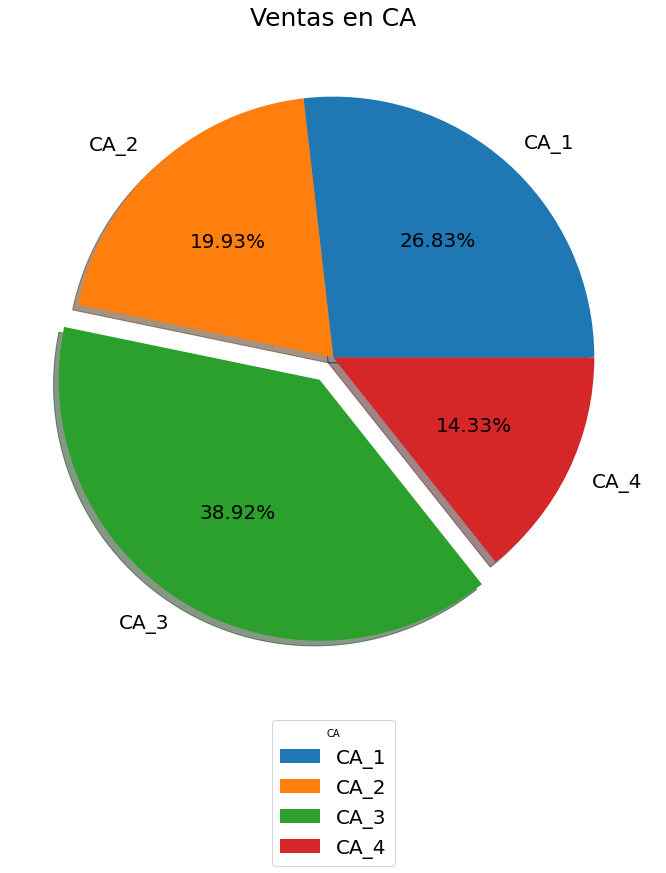

In [23]:
plt.figure(figsize=(12,12))
plt.pie(df1_Ca_g1[6], 
labels= df1_Ca_g1.index,
textprops={"fontsize":20},
explode=[0,0,.1,0],
shadow = True ,
autopct= '%1.2f%%'
)

plt.title('Ventas en CA',fontsize=25)

plt.legend(title= 'CA', fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=1)

plt.savefig("2_Venta_en_cantidad_por_tienda_CA.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/2_Venta_en_cantidad_por_tienda_CA.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/2_Venta_en_cantidad_por_tienda_CA.png'
shutil.move(pos1,pos2)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

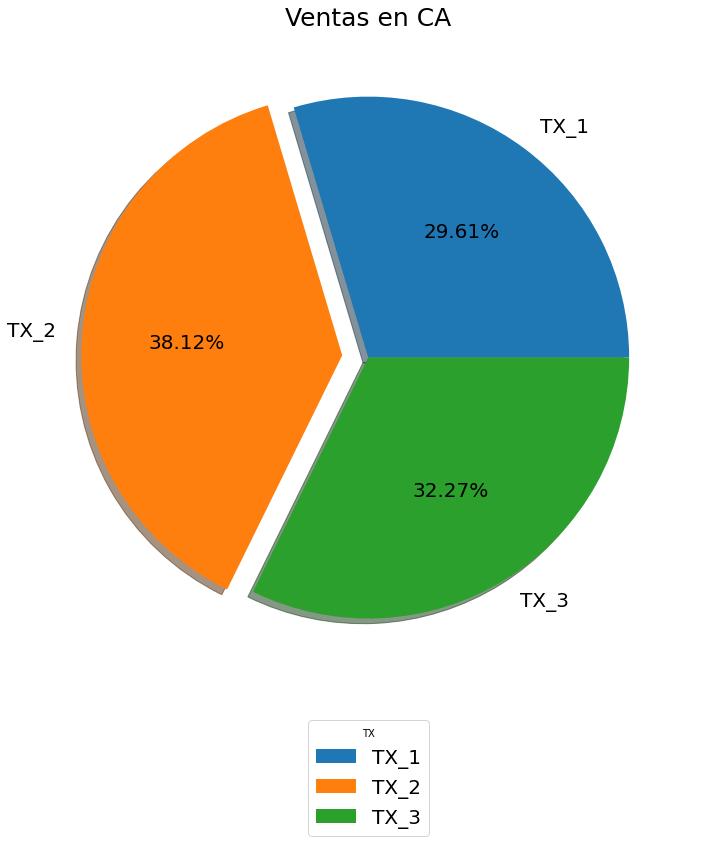

In [24]:
plt.figure(figsize=(12,12))
plt.pie(df1_TX_g1[6], 
labels= df1_TX_g1.index,
textprops={"fontsize":20},
explode=[0,.1,0],
shadow = True ,
autopct= '%1.2f%%'
)

plt.title('Ventas en CA',fontsize=25)

plt.legend(title= 'TX', fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=1)

plt.savefig("3_Venta_en_cantidad_por_tienda_TX.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/3_Venta_en_cantidad_por_tienda_TX.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/3_Venta_en_cantidad_por_tienda_TX.png'
shutil.move(pos1,pos2)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

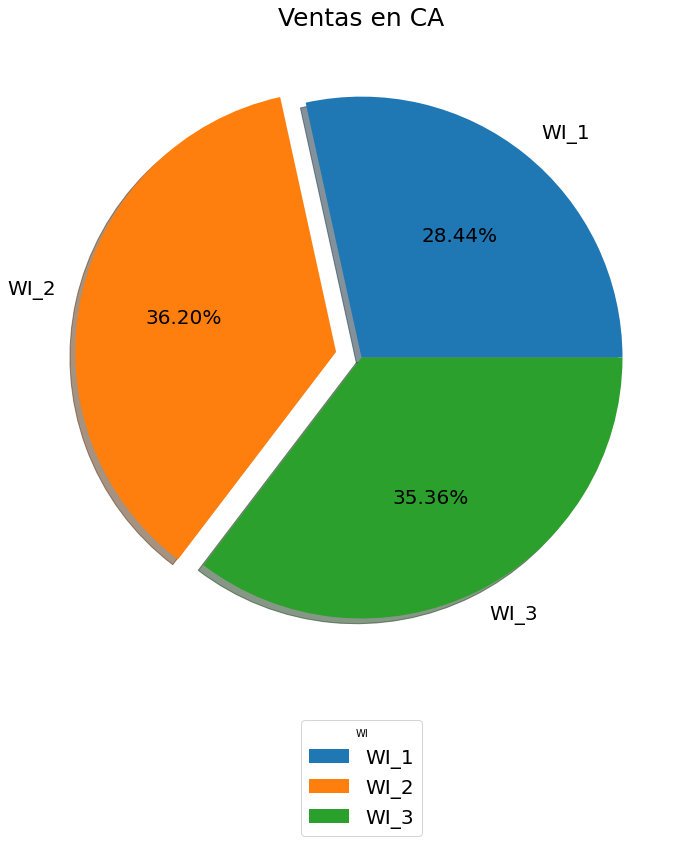

In [25]:
plt.figure(figsize=(12,12))
plt.pie(df1_WI_g1[6], 
labels= df1_WI_g1.index,
textprops={"fontsize":20},
explode=[0,.1,0],
shadow = True ,
autopct= '%1.2f%%'
)

plt.title('Ventas en CA',fontsize=25)

plt.legend(title= 'WI', fontsize=20, loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=1)

plt.savefig("4_Venta_en_cantidad_por_tienda_WI.png")
pos1= '/Users/yairmartinez/Documents/GitHub/Data_visualization/4_Venta_en_cantidad_por_tienda_WI.png'
pos2= '/Users/yairmartinez/Documents/GitHub/Data_visualization/Load/Gráficas/4_Venta_en_cantidad_por_tienda_WI.png'
shutil.move(pos1,pos2)

plt.show